# CNN classification on CIFAR-10
-  The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
-  There are 50000 training images and 10000 test images.
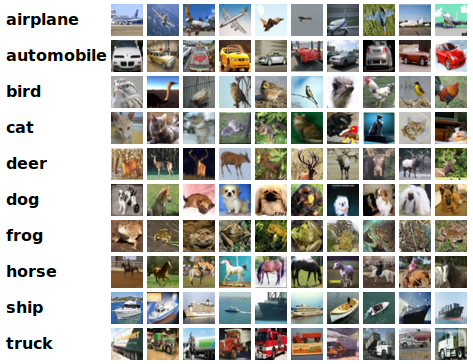

## Download dataset
Loading the dataset returns four NumPy arrays:
-  The <font color=green><b>train_images</b></font> and <font color=green><b>train_labels</b></font> arrays are the training set—the data the model uses to learn.
-  The model is tested against the test set, the <font color=red><b>test_images</b></font>, and <font color=red><b>test_labels</b></font> arrays.

-  The images are 32x32<font color=red><b>x3</b></font> NumPy arrays, with pixel values ranging between 0 and 255. 
-  The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

<td style="text-align:left;">

| Lable|Class|
|---|---|
|   0   | airplane|
|   1   | automobile    |
|   2   | bird   |
|   3   | cat      |
|   4   | deer       |
|   5   | dog     |
|   6   | frog      |
|   7   | horse    |
|   8   | ship        |
|   9   | truck |



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0


In [2]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape)
train_labels.shape


(50000, 32, 32, 3)


(50000, 1)

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
num_classes = len(class_names)

In [5]:
# train_y = keras.utils.to_categorical(train_labels, num_classes)

In [6]:
# train_y[5]

## Explore the data

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
train_labels.shape

(50000, 1)

In [9]:
test_images.shape

(10000, 32, 32, 3)

In [10]:
test_labels.shape

(10000, 1)

In [11]:
train_labels[5]

array([1], dtype=uint8)

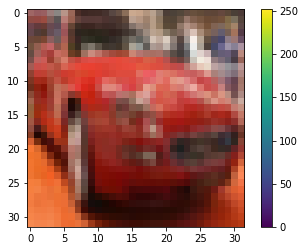

In [12]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

### Display the first 25 images

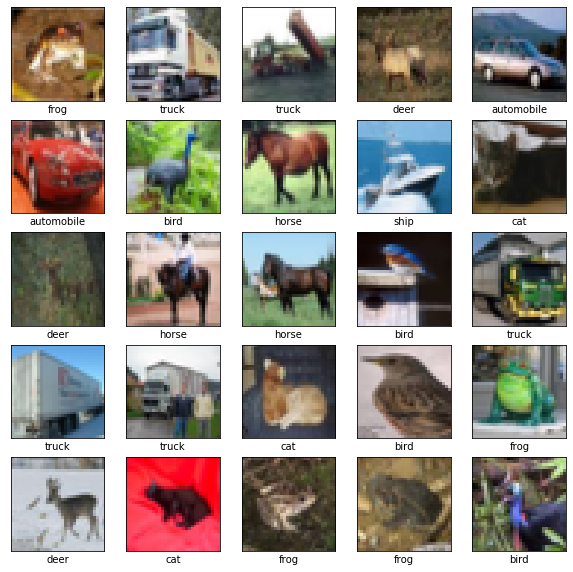

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## CNN with Keras
1. Represnetation
        1.1  Download dataset        
        1.2  Split the dataset into two parts        
        1.3  Scale the data        
2. Model (either sequential model or functional model)
        2.1  Build model        
        2.2  Compile        
        2.3  Fit by train data, considering the data format 
3. Evaluation
4. Visualization

### 1. Representation

In [48]:
## load dataset
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [49]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

In [50]:
train_images.shape

(50000, 32, 32, 3)

In [51]:
# train_images

In [52]:
# Scale value to range 0 to 1 
train_images = train_images / 255.0
test_images = test_images / 255.0

In [53]:
x_train=train_images.reshape((len(train_images)),-1) #for svm
x_test=test_images.reshape((len(test_images)),-1)
x_train.shape

(50000, 3072)

In [54]:
x_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

### 2. Model
#### 2.1 Build model

In [55]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [56]:
bn_axis = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))#
model.add(Activation('relu'))#
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # pervent overfitting dropout randomly

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [57]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.summary()   ## 3 * 3 * 3 channels = 27, 32 * 27 + 32 * 1 bias = 896; 512 * 10 + 1 * 10 = 5130

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)       

#### <font color='red'>Question: how to calculate the parameter number, i.e., 896 or 5130 ?</font> 

In [60]:
hist = model.fit(train_images, train_labels, batch_size=64 ,epochs=10, validation_data=(test_images,test_labels) )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 353s 7ms/step - loss: 1.5689 - accuracy: 0.4244 - val_loss: 1.2070 - val_accuracy: 0.5684
Epoch 2/10
50000/50000 [==============================] - 338s 7ms/step - loss: 1.1611 - accuracy: 0.5863 - val_loss: 1.0947 - val_accuracy: 0.6048
Epoch 3/10
50000/50000 [==============================] - 354s 7ms/step - loss: 0.9957 - accuracy: 0.6496 - val_loss: 0.9533 - val_accuracy: 0.6643
Epoch 4/10
50000/50000 [==============================] - 338s 7ms/step - loss: 0.8931 - accuracy: 0.6845 - val_loss: 0.8049 - val_accuracy: 0.7168
Epoch 5/10
50000/50000 [==============================] - 348s 7ms/step - loss: 0.8149 - accuracy: 0.7146 - val_loss: 0.7693 - val_accuracy: 0.7341
Epoch 6/10
50000/50000 [==============================] - 346s 7ms/step - loss: 0.7659 - accuracy: 0.7312 - val_loss: 0.7647 - val_accuracy: 0.7350
Epoch 7/10
50000/50000 [==============================] - 426s

### 3. Visualization

In [ ]:
# list all data in history
print(hist.history.keys())

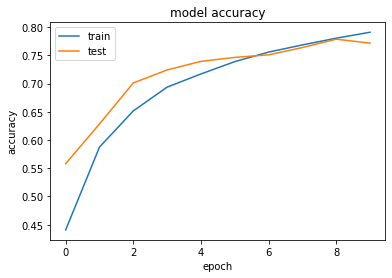

In [24]:
# summarize history for accuracy
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

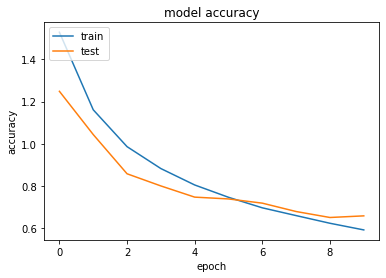

In [25]:
# summarize history for loss value
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4. Evaluation on test set

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 4s 365us/step
Test accuracy: 0.7714999914169312


### 5. Batch prediction

In [27]:
predictions = model.predict(test_images)

In [28]:
predictions[2]

array([5.0534926e-02, 3.3611724e-01, 1.9682306e-04, 1.7027630e-03,
       3.8460210e-05, 1.1555214e-04, 1.4176760e-05, 5.4177312e-05,
       2.7478951e-01, 3.3643633e-01], dtype=float32)

In [29]:
np.argmax(predictions[2])

9

In [30]:
# ground truth
test_labels[2]

array([8])

In [31]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')


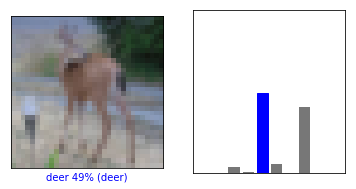

In [28]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


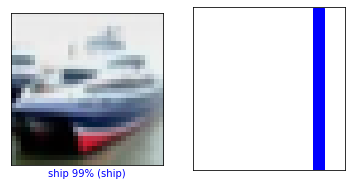

In [32]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


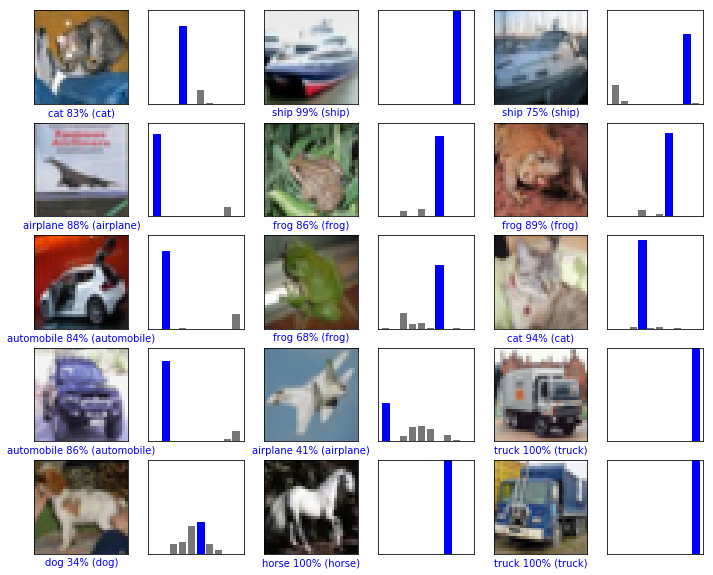

In [30]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()


### 5.2 Individual prediction
keras models are optimized to <b>make predictions on a batch</b>, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [31]:
img = test_images[2]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 32, 32, 3)


#### <font color='red'>Question: what is the difference between batch prediction and individual prediction? ?</font>

In [32]:
predictions_single = model.predict(img)

print(predictions_single)


[[2.0700732e-01 3.3458646e-02 1.8747167e-04 4.9826049e-04 6.9809350e-05
  1.2885925e-05 1.4748629e-05 6.4612992e-05 7.5004590e-01 8.6404048e-03]]


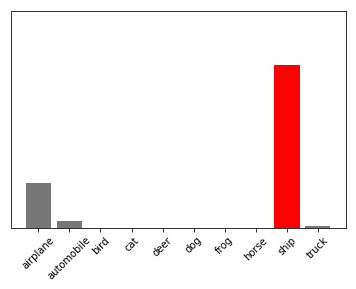

In [33]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

### Classification using SVM on CIFAR10

In [8]:
from sklearn import svm

In [9]:
clf = svm.SVC(gamma='scale')

In [ ]:
clf.fit(x_train[0:100,],train_labels[0:100,])

/Applications/Anaconda3/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf.predict(x_test[0:100,])

In [ ]:
print(clf.score(x_test[0:100,],test_labels[0:100,]))

### Exercise 1
    Convert the above Sequential model to the functional model

In [61]:
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten, Dropout
from keras.models import Model
from keras.utils import np_utils

In [62]:
#load datasets
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape(-1, 32, 32, 3)
train_images = train_images.astype('float32')
train_images /= 255


test_images= test_images.reshape(-1, 32, 32, 3)
test_images = test_images.astype('float32')
test_images /= 255

train_labels = to_categorical(train_labels, 10)
print(train_labels.shape)

test_labels = to_categorical(test_labels, 10)
test_labels.shape

NameError: name 'to_categorical' is not defined

In [ ]:
#y_train=np_utils.to_categorical(train_labels,num_classes=10)
#y_test=np_utils.to_categorical(test_labels,num_classes=10)

#print(y_train.shape)
#print(y_test.shape)

In [ ]:
################################
###### insert codes here #######
################################

model.summary()

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_images, train_labels,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images, test_labels))

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('loss:%.4f accuracy:%.4f' %(loss, accuracy))

### Exercise 2
    Classification using CNN on the MNIST dataset (either functional model or sequential model)

In [327]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

In [328]:
#load datasets
train_X, train_y = mnist.load_data()[0]
print(train_X.shape)
train_X = train_X.reshape(-1, 28, 28, 1)
train_X = train_X.astype('float32')
train_X /= 255
train_y = to_categorical(train_y, 10)

test_X, test_y = mnist.load_data()[1]
test_X = test_X.reshape(-1, 28, 28, 1)
test_X = test_X.astype('float32')
test_X /= 255
test_y = to_categorical(test_y, 10)

(60000, 28, 28)


In [329]:
model = Sequential()
################################
###### insert codes here #######
################################
model.summary()

In [346]:
model.compile(loss=categorical_crossentropy,
            optimizer=Adadelta(),
            metrics=['accuracy'])

model.fit(train_X, train_y,  batch_size=100, epochs=10)

In [ ]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=1)
print('loss:%.4f accuracy:%.4f' %(loss, accuracy))

### Exercise 3
    Classification using CONV1D in CNN on the MNIST dataset (either functional model or sequential model)

In [ ]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import Input, Conv1D, BatchNormalization, Activation, MaxPooling1D, Dropout, Flatten, Dense
from keras.models import Sequential
import numpy as np

In [ ]:
train_X, train_y = mnist.load_data()[0]
# train_X = train_X.reshape(-1, 28, 28, 1)
# train_X = train_X.astype('float32')

# train_X /= 255
train_y = to_categorical(train_y, 10)

test_X, test_y = mnist.load_data()[1]
# test_X = test_X.reshape(-1, 28, 28, 1)
# test_X = test_X.astype('float32')
# test_X /= 255
test_y = to_categorical(test_y, 10)
print(train_X.shape)
train_X = train_X.reshape((len(train_X), np.prod(train_X.shape[1:])))
test_X = test_X.reshape((len(test_X), np.prod(test_X.shape[1:])))
# print(train_X.shape)

train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
print(train_X.shape)

In [ ]:
model = Sequential()

################################
###### insert codes here #######
################################

model.summary()

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_X, train_y,  batch_size=500, epochs=5)

In [ ]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=1)
print('loss:%.4f accuracy:%.4f' %(loss, accuracy))

### Exercise 4
    Classification using Logistic Regression on CIFAR10

In [345]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape)

train_x = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_x = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
print(train_x)

################################
###### insert codes here #######
################################

y_pred_lr = lr.predict(test_x)
score = lr.score(test_x,test_labels)
print(score)

(50000, 32, 32, 3)
[[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [ 35 178 235 ...  12  31  50]
 [189 211 240 ... 195 190 171]
 [229 229 239 ... 163 163 161]]


C:\Users\jgan\.conda\envs\py3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jgan\.conda\envs\py3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.4024


### Exercise 5
    Classification using kNN on CIFAR10

In [ ]:
################################
###### insert codes here #######
################################

y_pred_knn = knn_3.predict(test_x[0:100,])
score = knn_3.score(test_x[0:100,],test_labels[0:100,])
print(score)

C:\Users\jgan\.conda\envs\py3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


##  Conclusion
###   Input is 3D data for each sample
###   Functional model and Sequential model